In [1]:
#Importando librerias
!pip install nltk

import pandas


In [2]:
!pip install TextBlob
!pip install wordcloud
!pip install sklearn
#Instalando librerias

In [3]:
# importando librerias necesarias
import pandas as pd
import numpy as np
import re
import string
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')
from matplotlib import style
style.use('ggplot')
from textblob import TextBlob
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Grant\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
!pip install seaborn
#instalando librerias

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.stem import PorterStemmer
plt.style.use("ggplot")

import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Grant\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [14]:
#leyendo dataset de twitter con 1 millon de records
df = pd.read_csv('tweets_climatechange.csv')

In [15]:
df.head()

,Unnamed: 0,Date,User,Tweet
0,0,2022-09-04 23:56:08+00:00,Nagpurninja,When #climatechange was known as #GlobalWarmin...
1,1,2022-09-04 23:55:23+00:00,FChishtie,Your attendance is requested. Tickets are free...
2,2,2022-09-04 23:53:18+00:00,AMadison1788,The “problem” of nuclear waste has already bee...
3,3,2022-09-04 23:52:02+00:00,SvenVanZanten01,Another Win for Renewables.\n\n#svenvanzanten ...
4,4,2022-09-04 23:49:30+00:00,HarryB808080,@SebGorka @JustinTrudeau He’ll blame it on #cl...


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Unnamed: 0  1000000 non-null  int64 
 1   Date        1000000 non-null  object
 2   User        1000000 non-null  object
 3   Tweet       1000000 non-null  object
dtypes: int64(1), object(3)
memory usage: 30.5+ MB


In [6]:
!pip install nltk
from nltk.tokenize import word_tokenize

In [18]:
#Definiendo funcion que se encarga de eliminar links, menciones, hashtags, stopwords
def sinstopwords(tweet):
  tweet = re.sub(r"http\S+|www\S+|https\S+", '', tweet, flags=re.MULTILINE)
  # Remove user @ references and '#' from tweet
  tweet = re.sub(r"#(\w+)", ' ', tweet, flags=re.MULTILINE)
  # Remove punctuations
  tweet = re.sub(r"@(\w+)", ' ', tweet, flags=re.MULTILINE)
  # Remove spaces 
  tweet = re.sub(r'[^\w\s]', '', tweet)
  tweet = re.sub(r' +', ' ', tweet)
  tweet_tokens = word_tokenize(tweet)
  filtered_words = [w for w in tweet_tokens if not w in stop_words]
  return " ".join(filtered_words)

In [19]:
#Aplicando la funcion de procesamiento y transformacion de datos
df['tweet'] = df['Tweet'].apply(sinstopwords)

In [20]:
print(df['tweet'].iloc[0],"\n")
print(df['tweet'].iloc[1],"\n")
print(df['tweet'].iloc[2],"\n")
print(df['tweet'].iloc[3],"\n")
print(df['tweet'].iloc[4],"\n")

When known long ozone layer depletion acid rain 

Your attendance requested Tickets free 

The problem nuclear waste already solved 

Another Win Renewables 

Hell blame 



In [21]:
#Definiendo funcion de polaridad y subjetividad para libreria Textblob
def getpolarity(text):
  return TextBlob(text).sentiment.polarity

def getsubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

In [22]:
#aplicando las funciones en el texto del tweet
df['Subjetivity'] = df['tweet'].apply(getsubjectivity)
df['Polarity'] = df['tweet'].apply(getpolarity)
df.head()

,Unnamed: 0,Date,User,Tweet,tweet,Subjetivity,Polarity
0,0,2022-09-04 23:56:08+00:00,Nagpurninja,When #climatechange was known as #GlobalWarmin...,When known long ozone layer depletion acid rain,0.4,-0.05
1,1,2022-09-04 23:55:23+00:00,FChishtie,Your attendance is requested. Tickets are free...,Your attendance requested Tickets free,0.8,0.40
2,2,2022-09-04 23:53:18+00:00,AMadison1788,The “problem” of nuclear waste has already bee...,The problem nuclear waste already solved,0.0,-0.20
3,3,2022-09-04 23:52:02+00:00,SvenVanZanten01,Another Win for Renewables.\n\n#svenvanzanten ...,Another Win Renewables,0.4,0.80
4,4,2022-09-04 23:49:30+00:00,HarryB808080,@SebGorka @JustinTrudeau He’ll blame it on #cl...,Hell blame,0.0,0.00


In [27]:
#Definiendo la funcion sentimiento para clasificar los sentimientos
def sentiment(label):
  if label < 0:
    return "Negative"
  elif label == 0:
    return "Neutral"
  elif label > 0:
    return "Positive"

In [24]:
#Aplicando la funcion sentimiento al valor de polaridad el que se encarga de regir si la oracion es positiva, negativa o neutra
df['sentiment_TextBlob'] = df['Polarity'].apply(sentiment)

Text(0, 0.5, '')

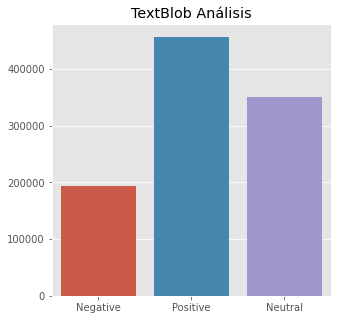

In [25]:
fig = plt.figure(figsize=(5,5))
sns.countplot(x='sentiment_TextBlob', data = df)
plt.title('TextBlob Análisis')
plt.xlabel("")
plt.ylabel("")

Text(0.5, 1.0, 'Distribución de Sentimientos TextBlob')

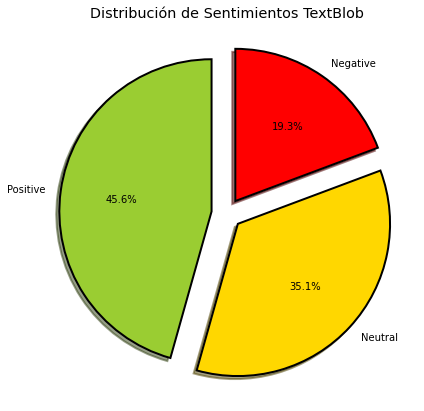

In [26]:
fig = plt.figure(figsize =(7,7))
colors = ('yellowgreen','gold','red')
wp ={'linewidth':2, 'edgecolor':'black'}
tags = df['sentiment_TextBlob'].value_counts()
explode = (0.1,0.1,0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors = colors, startangle=90, wedgeprops=wp, explode = explode, label='' )
plt.title('Distribución de Sentimientos TextBlob')

In [27]:
#Generando un dataframe con los tweets positivos en Textblob
pos_tweets = df[df.sentiment_TextBlob == 'Positive']
pos_tweets = pos_tweets.sort_values(['Polarity'], ascending = False)
pos_tweets

,Unnamed: 0,Date,User,Tweet,tweet,Subjetivity,Polarity,sentiment_TextBlob
682559,682559,2021-09-27 09:25:08+00:00,kevvief,Que for petrol ⛽️ at @Morrisons #gravesend Whi...,Que petrol While I amp shoppin Yes best way he...,0.300000,1.000000e+00,Positive
921338,921338,2021-06-11 22:54:12+00:00,RuthHolmes2,#DanielYule competes for #Switzerland but he w...,competes born His parents moved child start sk...,0.300000,1.000000e+00,Positive
504556,504556,2021-11-30 07:30:00+00:00,INBO_RIOB,#Ecosystems for #Adaptation Session at #IWRAWW...,Session INBO SG We launch security ltgt securi...,1.000000,1.000000e+00,Positive
922403,922403,2021-06-11 13:21:09+00:00,Al_Maldives,#ClimateChange hero #Parliament Speaker Ex Pre...,hero Speaker Ex President betrayed best friend...,0.300000,1.000000e+00,Positive
200056,200056,2022-05-25 13:48:01+00:00,unepwcmc,Science shows that #nature can provide the bes...,Science shows provide best defences impacts Ec...,0.300000,1.000000e+00,Positive
...,...,...,...,...,...,...,...,...
876015,876015,2021-07-03 12:28:40+00:00,TheErimtanAngle,#Canada's Burning: Yet the god known only as ...,Burning Yet god known seems helpless impotent ...,0.245833,3.469447e-18,Positive
215550,215550,2022-05-17 19:31:45+00:00,WaleedSSadek,#EU #Europe greenhouse gas emissions in last q...,greenhouse gas emissions last quarter 2021 hig...,0.379167,3.469447e-18,Positive
213871,213871,2022-05-18 15:00:24+00:00,EIA_News,#EU greenhouse gas emissions in the last quart...,greenhouse gas emissions last quarter 2021 hig...,0.379167,3.469447e-18,Positive
751575,751575,2021-08-27 14:39:32+00:00,u_voices,"Following the #IPCCReport2021, which raises al...",Following raises alarming concerns current ana...,0.370833,3.469447e-18,Positive


In [7]:
from PIL import Image
import numpy as np

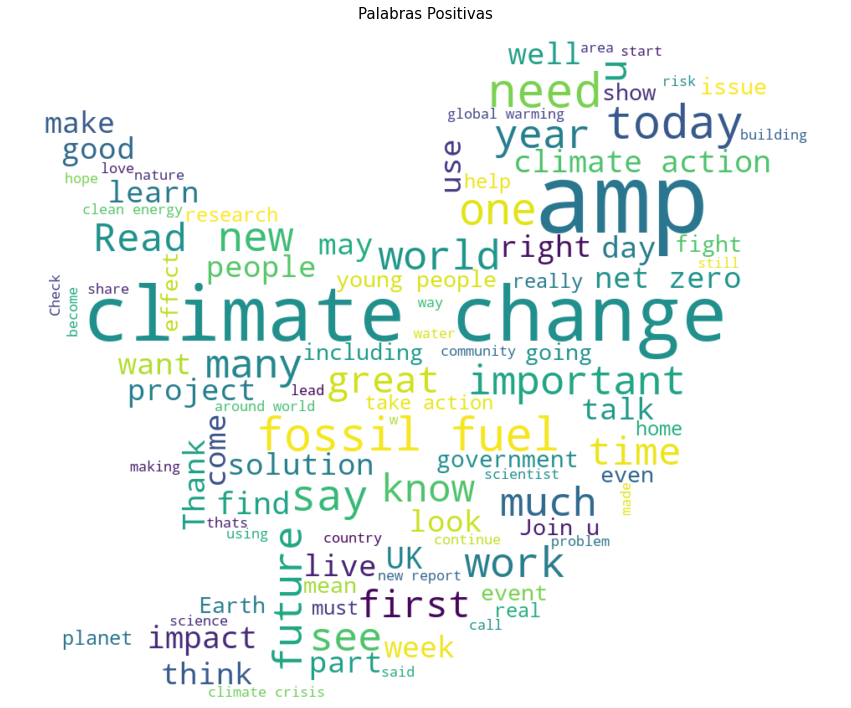

In [52]:
#creando wordcloud para tweets positivos
text = ''.join([word for word in pos_tweets['tweet']])
our_mask = np.array(Image.open("twitter_mask.png"))
wordcloud = WordCloud(max_words=100, background_color='white', mask = our_mask)
wordcloud.generate(text)
plt.figure(figsize=(15,15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Palabras Positivas', fontsize=15)
plt.show()

In [88]:
#Generando dataframe con los tweets negativos para textblob
neg_tweets = df[df.sentiment_TextBlob == 'Negative'] 
neg_tweets = neg_tweets.sort_values(['Polarity'], ascending = False)
neg_tweets

,Unnamed: 0.1,id,Negative,Neutral,Positive,Negative_Vaders,Neutral_Vaders,Positive_Vaders,Compound_Vaders,Unnamed: 0,Date,User,Tweet,tweet,Subjetivity,Polarity,sentiment_TextBlob,sentiment_VADER,Sentiment_Roberta
361143,361143,361144,0.731559,0.252060,0.016380,0.129,0.759,0.112,0.1280,361143,2022-02-28 17:06:39+00:00,Networkforyouth,14 Takeaways From The Latest U.N. Study On #Cl...,14 Takeaways From The Latest UN Study On Deadl...,0.476667,-2.775558e-18,Negative,Positive,Negative
669184,669184,669185,0.213433,0.721634,0.064934,0.172,0.738,0.089,-0.4019,669184,2021-10-02 21:16:36+00:00,bicycletting,@chris_murphy_ie @think_or_swim @Independent_i...,Im one whos trapped carsdependent lifestyle If...,0.162500,-3.469447e-18,Negative,Negative,Neutral
358434,358434,358435,0.545481,0.423923,0.030596,0.154,0.711,0.134,0.1280,358434,2022-03-01 15:19:03+00:00,PierreLabMN,14 Takeaways From The Latest U.N. Study On #Cl...,14 Takeaways From The Latest UN Study On Deadl...,0.570833,-3.469447e-18,Negative,Positive,Negative
76578,76578,76579,0.868706,0.124023,0.007271,0.313,0.465,0.222,-0.6705,76578,2022-07-28 08:52:37+00:00,REGreenPak,Recent floods have caused havoc in Upper #Chit...,Recent floods caused havoc Upper destroying pu...,0.139583,-3.469447e-18,Negative,Negative,Negative
63521,63521,63522,0.232044,0.714068,0.053888,0.232,0.591,0.177,-0.3182,63521,2022-08-03 15:47:04+00:00,planetaryhealt3,"""Climate change: As drought-hit Scotland is fo...",Climate change As droughthit Scotland forced b...,0.195833,-3.469447e-18,Negative,Negative,Neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
671436,671436,671437,0.281427,0.669994,0.048579,0.292,0.627,0.081,-0.7717,671436,2021-10-01 12:57:25+00:00,HBCUGreenFund,Greenpeace: RT @TheElders: Taking part in our ...,Greenpeace RT Taking part climate blog series ...,1.000000,-1.000000e+00,Negative,Negative,Neutral
627266,627266,627267,0.388186,0.552350,0.059464,0.323,0.677,0.000,-0.6486,627266,2021-10-21 01:45:33+00:00,JamesGlenFord3,.@USRepLong I'm a constituent and a voter in J...,Im constituent voter Joplin going devastating ...,1.000000,-1.000000e+00,Negative,Negative,Neutral
627264,627264,627265,0.388186,0.552350,0.059464,0.323,0.677,0.000,-0.6486,627264,2021-10-21 01:46:03+00:00,JamesGlenFord3,.@RoyBlunt I'm a constituent and a voter in Jo...,Im constituent voter Joplin going devastating ...,1.000000,-1.000000e+00,Negative,Negative,Neutral
253911,253911,253912,0.612475,0.373019,0.014506,0.312,0.688,0.000,-0.7717,253911,2022-04-26 07:00:00+00:00,ac1d_apu,PM #SheikhHasina asked everyone concerned to d...,PM asked everyone concerned design amp constru...,1.000000,-1.000000e+00,Negative,Negative,Negative


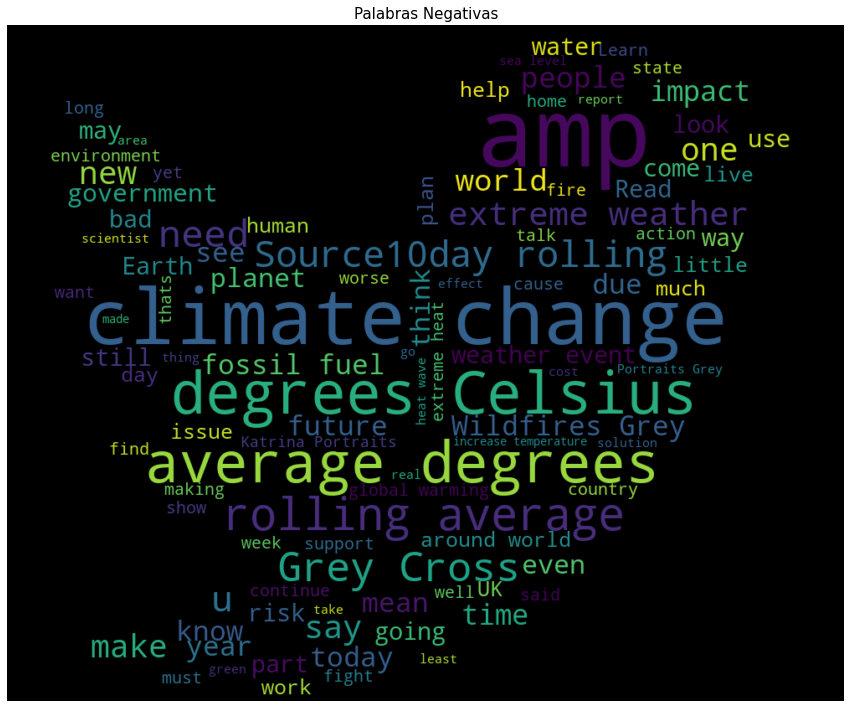

In [53]:
#Wordcloud con tweets negativos
text = ''.join([word for word in neg_tweets['tweet']])
our_mask = np.array(Image.open("twitter_mask.png"))
wordcloud = WordCloud(max_words=100, background_color='black', mask = our_mask)
wordcloud.generate(text)
plt.figure(figsize=(15,15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Palabras Negativas', fontsize=15)
plt.show()

In [35]:
#creando indice para iterar 
df['id'] = range(1, len(df) + 1)

In [6]:
#descargando paquetes necesarios de la libreria nltk para usar en el modelo VADER
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Grant\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Grant\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Grant\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [37]:
#analizando modelo VADER en cada tweet
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
  text = row['tweet']
  myid = row['id']
  res[myid] = sia.polarity_scores(text)

  0%|          | 0/1000000 [00:00<?, ?it/s]

In [38]:
#dataframe con los valores de VADER neg/neu/pos and compound que es el rige la clasificacion final
vaders = pd.DataFrame(res).T

In [39]:
vaders

,neg,neu,pos,compound
1,0.000,1.000,0.000,0.0000
2,0.000,0.548,0.452,0.5106
3,0.519,0.283,0.198,-0.5267
4,0.000,0.345,0.655,0.5859
5,1.000,0.000,0.000,-0.7906
...,...,...,...,...
999996,0.000,1.000,0.000,0.0000
999997,0.000,0.508,0.492,0.7003
999998,0.000,0.227,0.773,0.5267
999999,0.483,0.517,0.000,-0.9201


In [40]:
#cambiar el encabezado en el dataframe
vaders['Negative_Vaders'] = vaders['neg']
vaders['Neutral_Vaders'] = vaders['neu']
vaders['Positive_Vaders'] = vaders['pos']
vaders['Compound_Vaders'] = vaders['compound']

In [41]:
vaders = vaders.drop(['neg','pos','neu','compound'], axis=1)

In [42]:
#agregar las columnas del modelo al dataframe inicial
vaders = vaders.reset_index().rename(columns={'index':'id'})
vaders = vaders.merge(df, how='right')

In [43]:
df = vaders
df

,id,Negative_Vaders,Neutral_Vaders,Positive_Vaders,Compound_Vaders,Unnamed: 0,Date,User,Tweet,tweet,Subjetivity,Polarity,sentiment_TextBlob
0,1,0.000,1.000,0.000,0.0000,0,2022-09-04 23:56:08+00:00,Nagpurninja,When #climatechange was known as #GlobalWarmin...,When known long ozone layer depletion acid rain,0.400000,-0.05,Negative
1,2,0.000,0.548,0.452,0.5106,1,2022-09-04 23:55:23+00:00,FChishtie,Your attendance is requested. Tickets are free...,Your attendance requested Tickets free,0.800000,0.40,Positive
2,3,0.519,0.283,0.198,-0.5267,2,2022-09-04 23:53:18+00:00,AMadison1788,The “problem” of nuclear waste has already bee...,The problem nuclear waste already solved,0.000000,-0.20,Negative
3,4,0.000,0.345,0.655,0.5859,3,2022-09-04 23:52:02+00:00,SvenVanZanten01,Another Win for Renewables.\n\n#svenvanzanten ...,Another Win Renewables,0.400000,0.80,Positive
4,5,1.000,0.000,0.000,-0.7906,4,2022-09-04 23:49:30+00:00,HarryB808080,@SebGorka @JustinTrudeau He’ll blame it on #cl...,Hell blame,0.000000,0.00,Neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,999996,0.000,1.000,0.000,0.0000,999995,2021-05-01 13:07:57+00:00,HenryK_B_,"""#Renewables"" is anything but #renewable.\n#Gr...",anything,0.000000,0.00,Neutral
999996,999997,0.000,0.508,0.492,0.7003,999996,2021-05-01 13:07:03+00:00,TrippBraden,How Data Helps Companies Honor Their Climate G...,How Data Helps Companies Honor Their Climate G...,0.000000,0.00,Neutral
999997,999998,0.000,0.227,0.773,0.5267,999997,2021-05-01 13:05:42+00:00,PrimeNumero,Yay! #Newquay on the #RebellionOfOne map!!!\n\...,Yay map,0.000000,0.00,Neutral
999998,999999,0.483,0.517,0.000,-0.9201,999998,2021-05-01 13:04:36+00:00,B14News,🌍 Earlier this morning climate protesters sat ...,Earlier morning climate protesters sat junctio...,0.546667,-0.08,Negative


In [44]:
#agregar la columna sentiment_vader para identificar si el tweet es positivo negativo o neutro
df['sentiment_VADER'] = df['Compound_Vaders'].apply(sentiment)
df.head()

,id,Negative_Vaders,Neutral_Vaders,Positive_Vaders,Compound_Vaders,Unnamed: 0,Date,User,Tweet,tweet,Subjetivity,Polarity,sentiment_TextBlob,sentiment_VADER
0,1,0.000,1.000,0.000,0.0000,0,2022-09-04 23:56:08+00:00,Nagpurninja,When #climatechange was known as #GlobalWarmin...,When known long ozone layer depletion acid rain,0.4,-0.05,Negative,Neutral
1,2,0.000,0.548,0.452,0.5106,1,2022-09-04 23:55:23+00:00,FChishtie,Your attendance is requested. Tickets are free...,Your attendance requested Tickets free,0.8,0.40,Positive,Positive
2,3,0.519,0.283,0.198,-0.5267,2,2022-09-04 23:53:18+00:00,AMadison1788,The “problem” of nuclear waste has already bee...,The problem nuclear waste already solved,0.0,-0.20,Negative,Negative
3,4,0.000,0.345,0.655,0.5859,3,2022-09-04 23:52:02+00:00,SvenVanZanten01,Another Win for Renewables.\n\n#svenvanzanten ...,Another Win Renewables,0.4,0.80,Positive,Positive
4,5,1.000,0.000,0.000,-0.7906,4,2022-09-04 23:49:30+00:00,HarryB808080,@SebGorka @JustinTrudeau He’ll blame it on #cl...,Hell blame,0.0,0.00,Neutral,Negative


In [45]:
print(df['tweet'].iloc[3],"\n")

example = df['tweet'].iloc[3]

Another Win Renewables 



Text(0, 0.5, '')

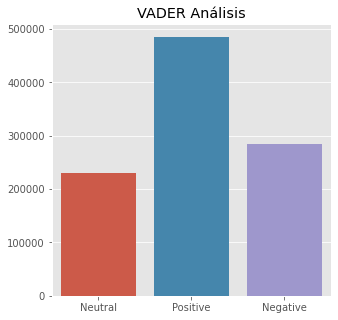

In [46]:
#grafico de barras para vader
df['sentiment_VADER'].value_counts()
fig = plt.figure(figsize=(5,5))
sns.countplot(x='sentiment_VADER', data = df)
plt.title('VADER Análisis')
plt.xlabel("")
plt.ylabel("")

Text(0.5, 1.0, 'Distribución de Sentimientos Vader')

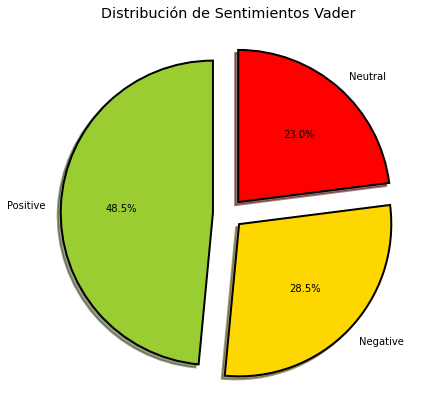

In [47]:
#grafico de porcentajes para VADER
fig = plt.figure(figsize =(7,7))
colors = ('yellowgreen','gold','red')
wp ={'linewidth':2, 'edgecolor':'black'}
tags = df['sentiment_VADER'].value_counts()
explode = (0.1,0.1,0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors = colors, startangle=90, wedgeprops=wp, explode = explode, label='' )
plt.title('Distribución de Sentimientos Vader')

In [48]:
#tweets positivos para vader
pos_tweets_vader = df[df.sentiment_VADER == 'Positive']
pos_tweets_vader = pos_tweets_vader.sort_values(['Compound_Vaders'], ascending = False)
pos_tweets_vader

,id,Negative_Vaders,Neutral_Vaders,Positive_Vaders,Compound_Vaders,Unnamed: 0,Date,User,Tweet,tweet,Subjetivity,Polarity,sentiment_TextBlob,sentiment_VADER
140173,140174,0.000,0.154,0.846,0.9944,140173,2022-06-28 12:16:55+00:00,AnOldManStream1,Come on! You all know you want to give this a ...,Come You know want give shot If children grand...,0.770833,0.775000,Positive,Positive
931376,931377,0.000,0.308,0.692,0.9890,931376,2021-06-07 20:35:54+00:00,patriciajuustic,"Great team, great company, great road map! I'm...",Great team great company great road map Im sur...,0.807099,0.722222,Positive,Positive
212965,212966,0.000,0.226,0.774,0.9874,212965,2022-05-19 01:32:15+00:00,RobHinchcliffe_,I love our Absolutely truly wonderful group of...,I love Absolutely truly wonderful group super ...,0.764583,0.566667,Positive,Positive
138187,138188,0.000,0.158,0.842,0.9872,138187,2022-06-29 12:17:04+00:00,unified_film,"But before we announce the prizes, we would li...",But announce prizes would like take opportunit...,0.900000,0.400000,Positive,Positive
945764,945765,0.000,0.200,0.800,0.9850,945764,2021-06-01 11:56:55+00:00,Plastic_voss,@Ecowatt_ A great project that is strong and ...,A great project strong good known team definit...,0.655556,0.572222,Positive,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376688,376689,0.210,0.543,0.246,0.0005,376688,2022-02-18 17:26:31+00:00,afsc_org,"With #BuildBackBetter, working families and th...",With working families children get support exp...,0.350000,-0.150000,Negative,Positive
97659,97660,0.250,0.500,0.250,0.0005,97659,2022-07-20 00:15:10+00:00,guilduma,#bilingual with exceedingly high #summer tempe...,exceedingly high temperatures neat Not happy v...,0.513333,-0.080000,Negative,Positive
522649,522650,0.139,0.722,0.139,0.0005,522649,2021-11-19 14:46:20+00:00,PlanningTank,Despite the damaging effects of marine polluti...,Despite damaging effects marine pollution 8 mi...,0.000000,0.000000,Neutral,Positive
946896,946897,0.167,0.611,0.222,0.0005,946896,2021-05-31 19:12:54+00:00,Mattias_S,"Yes, the next three will be crucial. Not only ...",Yes next three crucial Not achieve success fut...,0.187500,0.050000,Positive,Positive


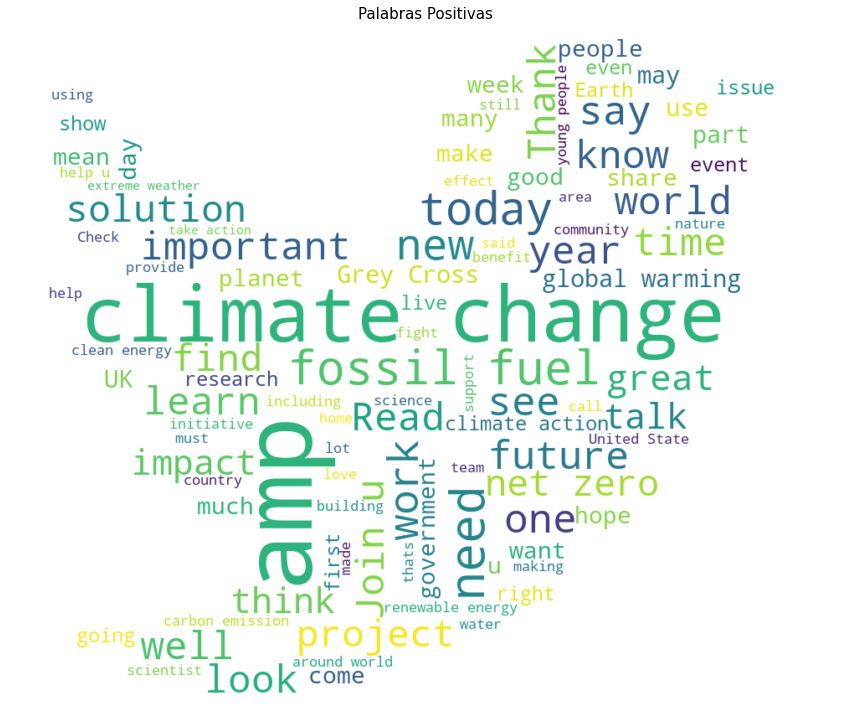

In [54]:
#wordcloud para vader
text = ''.join([word for word in pos_tweets_vader['tweet']])
our_mask = np.array(Image.open("twitter_mask.png"))
wordcloud = WordCloud(max_words=100, background_color='white', mask = our_mask)
wordcloud.generate(text)
plt.figure(figsize=(15,15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Palabras Positivas', fontsize=15)
plt.show()

In [89]:
#tweets negativos para vader
neg_tweets_vader = df[df.sentiment_VADER == 'Negative'] 
neg_tweets_vader = neg_tweets_vader.sort_values(['Compound_Vaders'], ascending = False)
neg_tweets_vader

,Unnamed: 0.1,id,Negative,Neutral,Positive,Negative_Vaders,Neutral_Vaders,Positive_Vaders,Compound_Vaders,Unnamed: 0,Date,User,Tweet,tweet,Subjetivity,Polarity,sentiment_TextBlob,sentiment_VADER,Sentiment_Roberta
286002,286002,286003,0.288102,0.583538,0.128360,0.146,0.708,0.146,-0.0001,286002,2022-04-11 13:46:10+00:00,GenevieGreer2,~The scientific evidence is unequivocal: #clim...,The scientific evidence unequivocal THREAT hum...,0.100000,0.000000,Neutral,Negative,Neutral
111159,111159,111160,0.006711,0.228392,0.764897,0.222,0.523,0.255,-0.0002,111159,2022-07-14 17:12:59+00:00,IBEW569,#IBEW 569 continues to support the @sdmts Zer...,569 continues support Zero Emission Bus Transi...,0.466667,0.333333,Positive,Negative,Positive
514976,514976,514977,0.255877,0.679614,0.064509,0.111,0.779,0.111,-0.0005,514976,2021-11-23 22:01:23+00:00,great_thunberg,The future of climate: do you have any idea wh...,The future climate idea whats really coming Ev...,0.350000,0.070000,Positive,Negative,Neutral
789180,789180,789181,0.623256,0.349499,0.027245,0.106,0.787,0.106,-0.0005,789180,2021-08-11 08:13:09+00:00,OOpenomi,When are you gonna learn the world isn't fun a...,When gon na learn world isnt fun rainbows arti...,0.400000,0.083333,Positive,Negative,Negative
780137,780137,780138,0.506155,0.455269,0.038576,0.111,0.779,0.111,-0.0005,780137,2021-08-14 05:22:05+00:00,bsindia,Scrappage policy to help in removing unfit veh...,Scrappage policy help removing unfit vehicles ...,0.000000,0.000000,Neutral,Negative,Negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14646,14646,14647,0.825791,0.167093,0.007116,0.723,0.277,0.000,-0.9896,14646,2022-08-28 14:36:21+00:00,eB3Design,majority of #Americans don't agree with the #G...,majority dont agree agenda every issue WRONG O...,0.900000,-0.500000,Negative,Negative,Negative
98496,98496,98497,0.676477,0.296499,0.027024,0.747,0.253,0.000,-0.9940,98496,2022-07-19 19:04:28+00:00,eB3Design,@ACTBrigitte #GOPisAlwaysWrongOnEveryIssue THA...,THAT IS EVIL PERSONIFIED WRONG ON WRONG ON WRO...,0.908333,-0.541667,Negative,Negative,Negative
400210,400210,400211,0.920176,0.074738,0.005086,0.941,0.042,0.017,-0.9962,400210,2022-02-04 10:10:54+00:00,MumClimate,Angry terrified helpless depressed anxious sca...,Angry terrified helpless depressed anxious sca...,0.781818,-0.540909,Negative,Negative,Negative
204635,204635,204636,0.869777,0.125911,0.004312,0.850,0.150,0.000,-0.9970,204635,2022-05-23 13:02:14+00:00,CovidSpacePunk,@_SteveRoJo @TomSyvret BUT..\n\n#Food Crisis\n...,BUT Crisis Crisis Crisis Crisis Crisis Crisis ...,0.000000,0.000000,Neutral,Negative,Negative


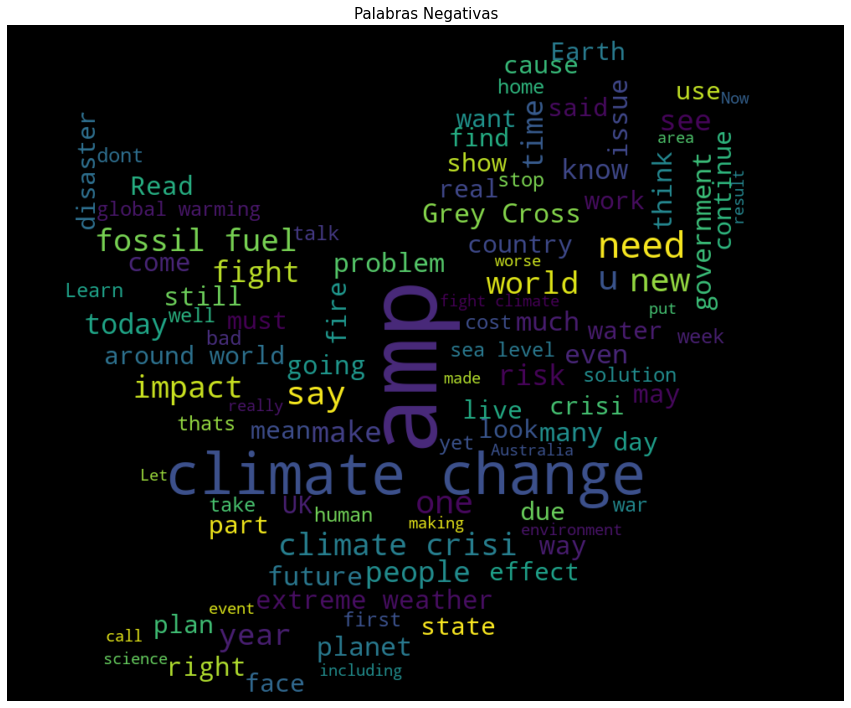

In [55]:
#wordcloud para vader
text = ''.join([word for word in neg_tweets_vader['tweet']])
our_mask = np.array(Image.open("twitter_mask.png"))
wordcloud = WordCloud(max_words=100, background_color='black', mask = our_mask)
wordcloud.generate(text)
plt.figure(figsize=(15,15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Palabras Negativas', fontsize=15)
plt.show()

In [9]:
#Instalando librerias para usar el modelo Roberta
!pip install scipy
!pip install transformers

In [10]:
#Instalando librerias
!pip install TensorFlow

In [11]:
!pip3 install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu113

Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cu113


In [12]:
#instalando funciones y modelos para la clasificacion al igual que softmax para convertir el output en un rango de -1 a 1
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax
import torch

In [13]:
#descargar el modelo que vamos a usar para el analisis de sentimiento
!pip3 install torch torchvision torchaudio
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [62]:
# Run en roberta model
enconded_text = tokenizer(example, return_tensors='pt')
output = model(**enconded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'Negative' : scores[0],
    'Neutral' : scores[1],
    'Positive' : scores[2]
    
}
print(scores_dict)

{'Negative': 0.0068898676, 'Neutral': 0.38355765, 'Positive': 0.6095525}


In [63]:
#definiendo funcion para run en roberta model
def polarity_scores_roberta(example):
  enconded_text = tokenizer(example, return_tensors='pt')
  output = model(**enconded_text)
  scores = output[0][0].detach().numpy()
  scores = softmax(scores)
  scores_dict = {
      'Negative' : scores[0],
      'Neutral' : scores[1],
      'Positive' : scores[2]
  }
  return(scores_dict)

In [64]:
#creacion de diccionario con los valores de robertamodel
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
  text = row['tweet']
  myid = row['id']
  roberta_result = polarity_scores_roberta(text)
  res[myid] = roberta_result

  0%|          | 0/1000000 [00:00<?, ?it/s]

In [65]:
#dataframe con los valores de robertamodel
roberta = pd.DataFrame(res).T

In [66]:
roberta

,Negative,Neutral,Positive
1,0.246468,0.724908,0.028625
2,0.008875,0.755258,0.235867
3,0.238832,0.631884,0.129284
4,0.006890,0.383558,0.609553
5,0.530770,0.417023,0.052207
...,...,...,...
999996,0.222077,0.587797,0.190125
999997,0.006587,0.306182,0.687231
999998,0.012723,0.292410,0.694867
999999,0.923920,0.072344,0.003736


In [67]:
#agregar columnas de roberta a dataframe inicial
roberta = roberta.reset_index().rename(columns={'index':'id'})
roberta = roberta.merge(df, how='right')

In [68]:
df = roberta
df

,id,Negative,Neutral,Positive,Negative_Vaders,Neutral_Vaders,Positive_Vaders,Compound_Vaders,Unnamed: 0,Date,User,Tweet,tweet,Subjetivity,Polarity,sentiment_TextBlob,sentiment_VADER
0,1,0.246468,0.724908,0.028625,0.000,1.000,0.000,0.0000,0,2022-09-04 23:56:08+00:00,Nagpurninja,When #climatechange was known as #GlobalWarmin...,When known long ozone layer depletion acid rain,0.400000,-0.05,Negative,Neutral
1,2,0.008875,0.755258,0.235867,0.000,0.548,0.452,0.5106,1,2022-09-04 23:55:23+00:00,FChishtie,Your attendance is requested. Tickets are free...,Your attendance requested Tickets free,0.800000,0.40,Positive,Positive
2,3,0.238832,0.631884,0.129284,0.519,0.283,0.198,-0.5267,2,2022-09-04 23:53:18+00:00,AMadison1788,The “problem” of nuclear waste has already bee...,The problem nuclear waste already solved,0.000000,-0.20,Negative,Negative
3,4,0.006890,0.383558,0.609553,0.000,0.345,0.655,0.5859,3,2022-09-04 23:52:02+00:00,SvenVanZanten01,Another Win for Renewables.\n\n#svenvanzanten ...,Another Win Renewables,0.400000,0.80,Positive,Positive
4,5,0.530770,0.417023,0.052207,1.000,0.000,0.000,-0.7906,4,2022-09-04 23:49:30+00:00,HarryB808080,@SebGorka @JustinTrudeau He’ll blame it on #cl...,Hell blame,0.000000,0.00,Neutral,Negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,999996,0.222077,0.587797,0.190125,0.000,1.000,0.000,0.0000,999995,2021-05-01 13:07:57+00:00,HenryK_B_,"""#Renewables"" is anything but #renewable.\n#Gr...",anything,0.000000,0.00,Neutral,Neutral
999996,999997,0.006587,0.306182,0.687231,0.000,0.508,0.492,0.7003,999996,2021-05-01 13:07:03+00:00,TrippBraden,How Data Helps Companies Honor Their Climate G...,How Data Helps Companies Honor Their Climate G...,0.000000,0.00,Neutral,Positive
999997,999998,0.012723,0.292410,0.694867,0.000,0.227,0.773,0.5267,999997,2021-05-01 13:05:42+00:00,PrimeNumero,Yay! #Newquay on the #RebellionOfOne map!!!\n\...,Yay map,0.000000,0.00,Neutral,Positive
999998,999999,0.923920,0.072344,0.003736,0.483,0.517,0.000,-0.9201,999998,2021-05-01 13:04:36+00:00,B14News,🌍 Earlier this morning climate protesters sat ...,Earlier morning climate protesters sat junctio...,0.546667,-0.08,Negative,Negative


In [69]:
#guardar archivo con el analisis 
df.to_csv('tweets_climatechange_analysis_sw.csv')

In [80]:
df = pd.read_csv('tweets_climatechange_analysis_sw.csv')

In [81]:
#seleccionar el valor mas alto de cada tweet para clasificar el sentimiento
df['Sentiment_Roberta'] = df[['Negative','Neutral','Positive']].idxmax(axis=1)

In [82]:
df


,Unnamed: 0.1,id,Negative,Neutral,Positive,Negative_Vaders,Neutral_Vaders,Positive_Vaders,Compound_Vaders,Unnamed: 0,Date,User,Tweet,tweet,Subjetivity,Polarity,sentiment_TextBlob,sentiment_VADER,Sentiment_Roberta
0,0,1,0.246468,0.724908,0.028625,0.000,1.000,0.000,0.0000,0,2022-09-04 23:56:08+00:00,Nagpurninja,When #climatechange was known as #GlobalWarmin...,When known long ozone layer depletion acid rain,0.400000,-0.05,Negative,Neutral,Neutral
1,1,2,0.008875,0.755258,0.235867,0.000,0.548,0.452,0.5106,1,2022-09-04 23:55:23+00:00,FChishtie,Your attendance is requested. Tickets are free...,Your attendance requested Tickets free,0.800000,0.40,Positive,Positive,Neutral
2,2,3,0.238832,0.631884,0.129284,0.519,0.283,0.198,-0.5267,2,2022-09-04 23:53:18+00:00,AMadison1788,The “problem” of nuclear waste has already bee...,The problem nuclear waste already solved,0.000000,-0.20,Negative,Negative,Neutral
3,3,4,0.006890,0.383558,0.609553,0.000,0.345,0.655,0.5859,3,2022-09-04 23:52:02+00:00,SvenVanZanten01,Another Win for Renewables.\n\n#svenvanzanten ...,Another Win Renewables,0.400000,0.80,Positive,Positive,Positive
4,4,5,0.530770,0.417023,0.052207,1.000,0.000,0.000,-0.7906,4,2022-09-04 23:49:30+00:00,HarryB808080,@SebGorka @JustinTrudeau He’ll blame it on #cl...,Hell blame,0.000000,0.00,Neutral,Negative,Negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,999995,999996,0.222077,0.587797,0.190125,0.000,1.000,0.000,0.0000,999995,2021-05-01 13:07:57+00:00,HenryK_B_,"""#Renewables"" is anything but #renewable.\n#Gr...",anything,0.000000,0.00,Neutral,Neutral,Neutral
999996,999996,999997,0.006587,0.306182,0.687231,0.000,0.508,0.492,0.7003,999996,2021-05-01 13:07:03+00:00,TrippBraden,How Data Helps Companies Honor Their Climate G...,How Data Helps Companies Honor Their Climate G...,0.000000,0.00,Neutral,Positive,Positive
999997,999997,999998,0.012723,0.292410,0.694867,0.000,0.227,0.773,0.5267,999997,2021-05-01 13:05:42+00:00,PrimeNumero,Yay! #Newquay on the #RebellionOfOne map!!!\n\...,Yay map,0.000000,0.00,Neutral,Positive,Positive
999998,999998,999999,0.923920,0.072344,0.003736,0.483,0.517,0.000,-0.9201,999998,2021-05-01 13:04:36+00:00,B14News,🌍 Earlier this morning climate protesters sat ...,Earlier morning climate protesters sat junctio...,0.546667,-0.08,Negative,Negative,Negative


Text(0, 0.5, '')

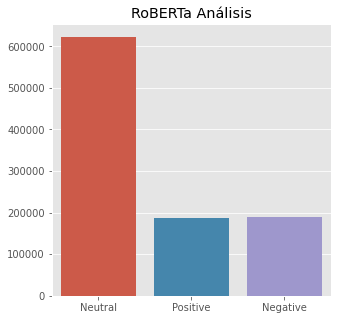

In [83]:
#grafico de barras de roberta
df['Sentiment_Roberta'].value_counts()
fig = plt.figure(figsize=(5,5))
sns.countplot(x='Sentiment_Roberta', data = df)
plt.title('RoBERTa Análisis')
plt.xlabel("")
plt.ylabel("")

Text(0.5, 1.0, 'Distribución de Sentimientos RoBERTa')

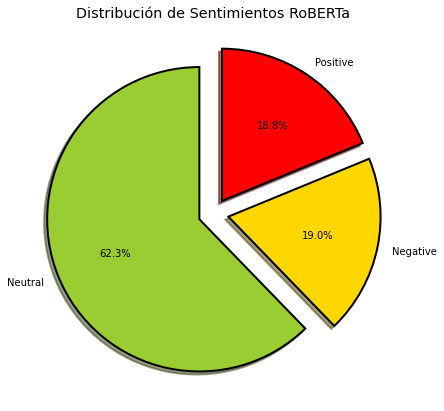

In [84]:
#grafico de porcentajes de roberta
fig = plt.figure(figsize =(7,7))
colors = ('yellowgreen','gold','red')
wp ={'linewidth':2, 'edgecolor':'black'}
tags = df['Sentiment_Roberta'].value_counts()
explode = (0.1,0.1,0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors = colors, startangle=90, wedgeprops=wp, explode = explode, label='' )
plt.title('Distribución de Sentimientos RoBERTa')

In [85]:
#tweets positivos roberta
pos_tweets_roberta = df[df.Sentiment_Roberta == 'Positive']
pos_tweets_roberta = pos_tweets_roberta.sort_values(['Sentiment_Roberta'], ascending = False)
pos_tweets_roberta

,Unnamed: 0.1,id,Negative,Neutral,Positive,Negative_Vaders,Neutral_Vaders,Positive_Vaders,Compound_Vaders,Unnamed: 0,Date,User,Tweet,tweet,Subjetivity,Polarity,sentiment_TextBlob,sentiment_VADER,Sentiment_Roberta
3,3,4,0.006890,0.383558,0.609553,0.000,0.345,0.655,0.5859,3,2022-09-04 23:52:02+00:00,SvenVanZanten01,Another Win for Renewables.\n\n#svenvanzanten ...,Another Win Renewables,0.400000,0.800000,Positive,Positive,Positive
664480,664480,664481,0.001659,0.052467,0.945874,0.000,0.842,0.158,0.4588,664480,2021-10-05 10:45:02+00:00,COACCH_EU,🙌🏻 Welcome to our brand new #ClimateChange #I...,Welcome brand new A userfriendly webbased tool...,0.436869,0.164394,Positive,Positive,Positive
664483,664483,664484,0.008417,0.462911,0.528672,0.000,0.872,0.128,0.6249,664483,2021-10-05 10:42:37+00:00,HumanFraternity,His Holiness Pope Francis &amp; His Eminence P...,His Holiness Pope Francis amp His Eminence Pro...,0.500000,0.400000,Positive,Positive,Positive
664484,664484,664485,0.034917,0.320311,0.644772,0.242,0.758,0.000,-0.6249,664484,2021-10-05 10:42:35+00:00,KartikeyaSingh,I'm really intrigued by this: After years of p...,Im really intrigued After years publicly dismi...,0.483333,-0.033333,Negative,Negative,Positive
664496,664496,664497,0.002644,0.131223,0.866133,0.000,0.619,0.381,0.8225,664496,2021-10-05 10:39:02+00:00,shafqatmunir,As always it was a pleasure to speak to @VOABA...,As always pleasure speak In latest session I p...,0.616667,0.300000,Positive,Positive,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346176,346176,346177,0.002136,0.069777,0.928088,0.000,0.659,0.341,0.6908,346176,2022-03-08 10:41:33+00:00,UNDP_Pakistan,"Many thanks to @ncswpk's @NilofarBkhtiar, @Pla...",Many thanks Senior Gender Advisor amp Senior G...,0.350000,0.350000,Positive,Positive,Positive
346181,346181,346182,0.001890,0.075967,0.922143,0.000,0.552,0.448,0.7579,346181,2022-03-08 10:40:07+00:00,sbnclima,This #InternationalWomensDay we celebrate the...,This celebrate leading charge safety building ...,0.125000,0.000000,Neutral,Positive,Positive
346190,346190,346191,0.001934,0.142263,0.855803,0.000,0.823,0.177,0.6249,346190,2022-03-08 10:36:33+00:00,EmmaHLCox,"As we mark #IWD2022, it's great to see the @wo...",As mark great see launch three new gender clim...,0.401515,0.312121,Positive,Positive,Positive
346197,346197,346198,0.001092,0.013842,0.985066,0.000,0.641,0.359,0.6801,346197,2022-03-08 10:32:40+00:00,AfricanMt,We have just purchased our first 2 pieces of m...,We purchased first 2 pieces monitoring equipme...,0.570833,0.206250,Positive,Positive,Positive


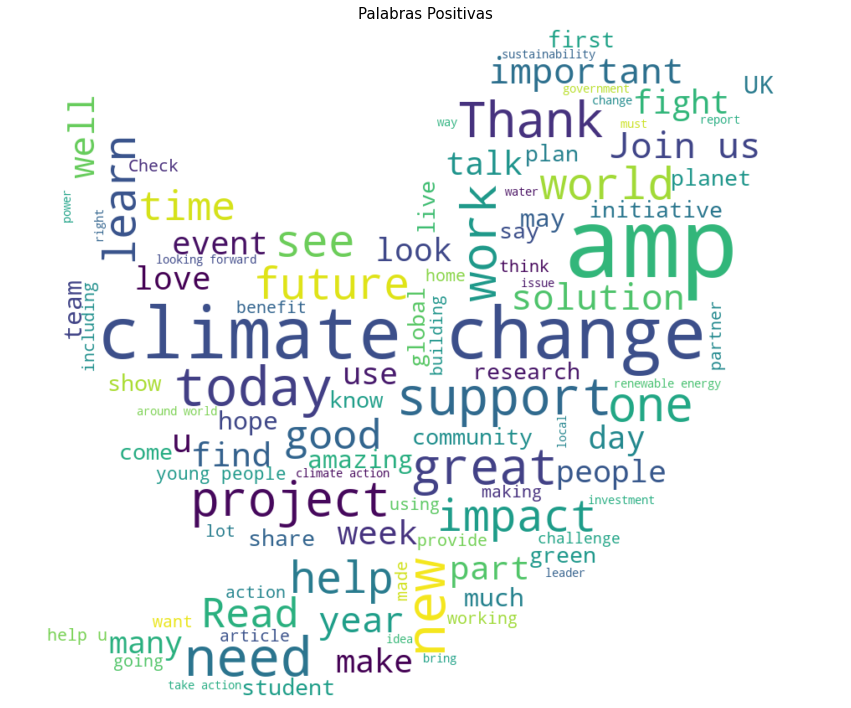

In [86]:
#world cloud tweets positivos roberta
text = ''.join([word for word in pos_tweets_roberta['tweet']])
our_mask = np.array(Image.open("twitter_mask.png"))
wordcloud = WordCloud(max_words=100, background_color='white', mask = our_mask)
wordcloud.generate(text)
plt.figure(figsize=(15,15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Palabras Positivas', fontsize=15)
plt.show()

In [87]:
#tweets negativos roberta
neg_tweets_roberta = df[df.Sentiment_Roberta == 'Negative'] 
neg_tweets_roberta = neg_tweets_roberta.sort_values(['Sentiment_Roberta'], ascending = False)
neg_tweets_roberta

,Unnamed: 0.1,id,Negative,Neutral,Positive,Negative_Vaders,Neutral_Vaders,Positive_Vaders,Compound_Vaders,Unnamed: 0,Date,User,Tweet,tweet,Subjetivity,Polarity,sentiment_TextBlob,sentiment_VADER,Sentiment_Roberta
4,4,5,0.530770,0.417023,0.052207,1.000,0.000,0.000,-0.7906,4,2022-09-04 23:49:30+00:00,HarryB808080,@SebGorka @JustinTrudeau He’ll blame it on #cl...,Hell blame,0.000000,0.000000,Neutral,Negative,Negative
676487,676487,676488,0.919523,0.077472,0.003005,0.394,0.391,0.215,-0.7834,676487,2021-09-29 14:02:00+00:00,HerFaithness,"If this does not horrify you, then there's som...",If horrify theres something wrong Male violenc...,0.500000,0.000000,Neutral,Negative,Negative
676438,676438,676439,0.737919,0.255054,0.007028,0.192,0.583,0.225,0.1027,676438,2021-09-29 14:17:58+00:00,TimMelino,Erin OTooles #CLIMATE policy contradictions co...,Erin OTooles policy contradictions could end t...,0.000000,0.000000,Neutral,Positive,Negative
676440,676440,676441,0.687051,0.297270,0.015679,0.301,0.515,0.184,-0.3818,676440,2021-09-29 14:16:02+00:00,NewBridgeAfrica,"Climate change, urban development and the $832...",Climate change urban development 832m natural ...,0.200000,0.050000,Positive,Negative,Negative
676441,676441,676442,0.687051,0.297270,0.015679,0.301,0.515,0.184,-0.3818,676441,2021-09-29 14:15:45+00:00,EmmanuelDogbevi,"Climate change, urban development and the $832...",Climate change urban development 832m natural ...,0.200000,0.050000,Positive,Negative,Negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314968,314968,314969,0.834819,0.158515,0.006666,0.128,0.872,0.000,-0.3612,314968,2022-03-25 19:17:00+00:00,DrPamOliver,#BlackMaternalHealth and #ClimateChange are tw...,two crises intricately linked Soaring temperat...,1.000000,-0.125000,Negative,Negative,Negative
314983,314983,314984,0.753090,0.227820,0.019090,0.000,0.777,0.223,0.3182,314983,2022-03-25 19:06:01+00:00,cleanjobspa,We can’t just “deal” with #climatechange anymo...,We cant deal anymore We need REAL solution need,0.300000,0.200000,Positive,Positive,Negative
315003,315003,315004,0.647928,0.324271,0.027800,0.000,1.000,0.000,0.0000,315003,2022-03-25 19:00:02+00:00,gezgintrk,Net Zero Is Impossible Unless The World Invest...,Net Zero Is Impossible Unless The World Invest...,0.500000,-0.333333,Negative,Neutral,Negative
315013,315013,315014,0.820324,0.164686,0.014989,0.327,0.532,0.141,-0.5994,315013,2022-03-25 18:56:11+00:00,neesietweets,How did I miss this hot♨️mess?: Former #UN #P...,How I miss hotmess Former Director Pause Popul...,0.500000,-0.500000,Negative,Negative,Negative


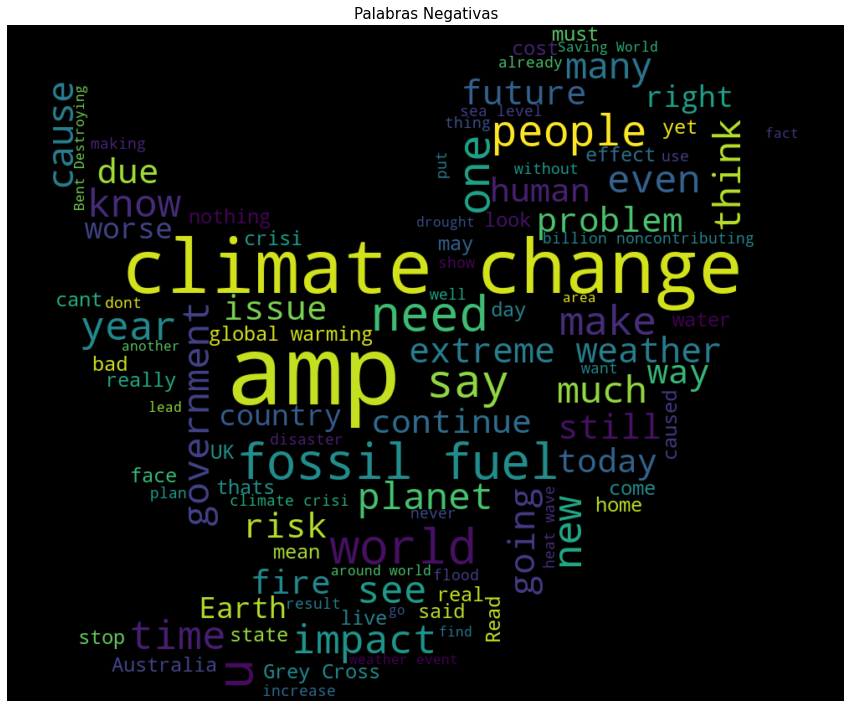

In [78]:
#wordcloud tweets negativos roberta
text = ''.join([word for word in neg_tweets_roberta['tweet']])
our_mask = np.array(Image.open("twitter_mask.png"))
wordcloud = WordCloud(max_words=100, background_color='black', mask = our_mask)
wordcloud.generate(text)
plt.figure(figsize=(15,15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Palabras Negativas', fontsize=15)
plt.show()

In [7]:
!pip install nbconvert

In [91]:
df.to_csv('tweets_climatechange_analysis_final.csv')

In [8]:
df = pd.read_csv('tweets_climatechange_analysis_final.csv')

In [9]:
df

,Unnamed: 0.2,Unnamed: 0.1,id,Negative,Neutral,Positive,Negative_Vaders,Neutral_Vaders,Positive_Vaders,Compound_Vaders,Unnamed: 0,Date,User,Tweet,tweet,Subjetivity,Polarity,sentiment_TextBlob,sentiment_VADER,Sentiment_Roberta
0,0,0,1,0.246468,0.724908,0.028625,0.000,1.000,0.000,0.0000,0,2022-09-04 23:56:08+00:00,Nagpurninja,When #climatechange was known as #GlobalWarmin...,When known long ozone layer depletion acid rain,0.400000,-0.05,Negative,Neutral,Neutral
1,1,1,2,0.008875,0.755258,0.235867,0.000,0.548,0.452,0.5106,1,2022-09-04 23:55:23+00:00,FChishtie,Your attendance is requested. Tickets are free...,Your attendance requested Tickets free,0.800000,0.40,Positive,Positive,Neutral
2,2,2,3,0.238832,0.631884,0.129284,0.519,0.283,0.198,-0.5267,2,2022-09-04 23:53:18+00:00,AMadison1788,The “problem” of nuclear waste has already bee...,The problem nuclear waste already solved,0.000000,-0.20,Negative,Negative,Neutral
3,3,3,4,0.006890,0.383558,0.609553,0.000,0.345,0.655,0.5859,3,2022-09-04 23:52:02+00:00,SvenVanZanten01,Another Win for Renewables.\n\n#svenvanzanten ...,Another Win Renewables,0.400000,0.80,Positive,Positive,Positive
4,4,4,5,0.530770,0.417023,0.052207,1.000,0.000,0.000,-0.7906,4,2022-09-04 23:49:30+00:00,HarryB808080,@SebGorka @JustinTrudeau He’ll blame it on #cl...,Hell blame,0.000000,0.00,Neutral,Negative,Negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,999995,999995,999996,0.222077,0.587797,0.190125,0.000,1.000,0.000,0.0000,999995,2021-05-01 13:07:57+00:00,HenryK_B_,"""#Renewables"" is anything but #renewable.\n#Gr...",anything,0.000000,0.00,Neutral,Neutral,Neutral
999996,999996,999996,999997,0.006587,0.306182,0.687231,0.000,0.508,0.492,0.7003,999996,2021-05-01 13:07:03+00:00,TrippBraden,How Data Helps Companies Honor Their Climate G...,How Data Helps Companies Honor Their Climate G...,0.000000,0.00,Neutral,Positive,Positive
999997,999997,999997,999998,0.012723,0.292410,0.694867,0.000,0.227,0.773,0.5267,999997,2021-05-01 13:05:42+00:00,PrimeNumero,Yay! #Newquay on the #RebellionOfOne map!!!\n\...,Yay map,0.000000,0.00,Neutral,Positive,Positive
999998,999998,999998,999999,0.923920,0.072344,0.003736,0.483,0.517,0.000,-0.9201,999998,2021-05-01 13:04:36+00:00,B14News,🌍 Earlier this morning climate protesters sat ...,Earlier morning climate protesters sat junctio...,0.546667,-0.08,Negative,Negative,Negative


In [10]:
df.shape

(1000000, 20)

In [11]:
df.tweet.isnull().sum()

481

In [12]:
df1 = df[df.tweet.isnull()]

In [13]:
df1.shape

(481, 20)

In [14]:
df1.index

Int64Index([   677,   1873,   2286,   4417,   6159,   8822,   8824,  11310,
             11312,  12300,
            ...
            976426, 976747, 977265, 978460, 979280, 979322, 980805, 981174,
            993015, 997261],
           dtype='int64', length=481)

In [15]:
df.drop(df[df.tweet.isnull()].index, inplace = True)

In [16]:
df.shape

(999519, 20)

In [17]:
df

,Unnamed: 0.2,Unnamed: 0.1,id,Negative,Neutral,Positive,Negative_Vaders,Neutral_Vaders,Positive_Vaders,Compound_Vaders,Unnamed: 0,Date,User,Tweet,tweet,Subjetivity,Polarity,sentiment_TextBlob,sentiment_VADER,Sentiment_Roberta
0,0,0,1,0.246468,0.724908,0.028625,0.000,1.000,0.000,0.0000,0,2022-09-04 23:56:08+00:00,Nagpurninja,When #climatechange was known as #GlobalWarmin...,When known long ozone layer depletion acid rain,0.400000,-0.05,Negative,Neutral,Neutral
1,1,1,2,0.008875,0.755258,0.235867,0.000,0.548,0.452,0.5106,1,2022-09-04 23:55:23+00:00,FChishtie,Your attendance is requested. Tickets are free...,Your attendance requested Tickets free,0.800000,0.40,Positive,Positive,Neutral
2,2,2,3,0.238832,0.631884,0.129284,0.519,0.283,0.198,-0.5267,2,2022-09-04 23:53:18+00:00,AMadison1788,The “problem” of nuclear waste has already bee...,The problem nuclear waste already solved,0.000000,-0.20,Negative,Negative,Neutral
3,3,3,4,0.006890,0.383558,0.609553,0.000,0.345,0.655,0.5859,3,2022-09-04 23:52:02+00:00,SvenVanZanten01,Another Win for Renewables.\n\n#svenvanzanten ...,Another Win Renewables,0.400000,0.80,Positive,Positive,Positive
4,4,4,5,0.530770,0.417023,0.052207,1.000,0.000,0.000,-0.7906,4,2022-09-04 23:49:30+00:00,HarryB808080,@SebGorka @JustinTrudeau He’ll blame it on #cl...,Hell blame,0.000000,0.00,Neutral,Negative,Negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,999995,999995,999996,0.222077,0.587797,0.190125,0.000,1.000,0.000,0.0000,999995,2021-05-01 13:07:57+00:00,HenryK_B_,"""#Renewables"" is anything but #renewable.\n#Gr...",anything,0.000000,0.00,Neutral,Neutral,Neutral
999996,999996,999996,999997,0.006587,0.306182,0.687231,0.000,0.508,0.492,0.7003,999996,2021-05-01 13:07:03+00:00,TrippBraden,How Data Helps Companies Honor Their Climate G...,How Data Helps Companies Honor Their Climate G...,0.000000,0.00,Neutral,Positive,Positive
999997,999997,999997,999998,0.012723,0.292410,0.694867,0.000,0.227,0.773,0.5267,999997,2021-05-01 13:05:42+00:00,PrimeNumero,Yay! #Newquay on the #RebellionOfOne map!!!\n\...,Yay map,0.000000,0.00,Neutral,Positive,Positive
999998,999998,999998,999999,0.923920,0.072344,0.003736,0.483,0.517,0.000,-0.9201,999998,2021-05-01 13:04:36+00:00,B14News,🌍 Earlier this morning climate protesters sat ...,Earlier morning climate protesters sat junctio...,0.546667,-0.08,Negative,Negative,Negative


In [18]:
!pip install -U pip setuptools wheel

In [19]:
!pip install -U spacy

In [20]:
!python -m spacy download en_core_web_md
!pip install spacytextblob

     ---------------------------------------- 42.8/42.8 MB 4.8 MB/s eta 0:00:00

2022-09-21 09:54:42.897388: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2022-09-21 09:54:42.900987: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-09-21 09:56:05.032928: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'nvcuda.dll'; dlerror: nvcuda.dll not found
2022-09-21 09:56:05.044359: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2022-09-21 09:56:05.194855: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: DESKTOP-3LDOLJK
2022-09-21 09:56:05.195284: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: DESKTOP-3LDOLJK



✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


In [21]:
#Importamos libreria spacy
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob
nlp = spacy.load("en_core_web_sm")
nlp.add_pipe("spacytextblob")

In [22]:
#Definiendo funcion de polaridad y subjetividad para libreria Textblob
def getpolarity_spacy(text):
    doc = nlp(text)
    return doc._.blob.polarity

def getsubjectivity_spacy(text):
    doc = nlp(text)
    return doc._.blob.subjectivity

In [24]:
df['sp']=df['tweet'].apply(getpolarity_spacy)
df['ss']=df['tweet'].apply(getsubjectivity_spacy)

In [25]:
df

,Unnamed: 0.2,Unnamed: 0.1,id,Negative,Neutral,Positive,Negative_Vaders,Neutral_Vaders,Positive_Vaders,Compound_Vaders,...,User,Tweet,tweet,Subjetivity,Polarity,sentiment_TextBlob,sentiment_VADER,Sentiment_Roberta,sp,ss
0,0,0,1,0.246468,0.724908,0.028625,0.000,1.000,0.000,0.0000,...,Nagpurninja,When #climatechange was known as #GlobalWarmin...,When known long ozone layer depletion acid rain,0.400000,-0.05,Negative,Neutral,Neutral,-0.05,0.400000
1,1,1,2,0.008875,0.755258,0.235867,0.000,0.548,0.452,0.5106,...,FChishtie,Your attendance is requested. Tickets are free...,Your attendance requested Tickets free,0.800000,0.40,Positive,Positive,Neutral,0.40,0.800000
2,2,2,3,0.238832,0.631884,0.129284,0.519,0.283,0.198,-0.5267,...,AMadison1788,The “problem” of nuclear waste has already bee...,The problem nuclear waste already solved,0.000000,-0.20,Negative,Negative,Neutral,-0.20,0.000000
3,3,3,4,0.006890,0.383558,0.609553,0.000,0.345,0.655,0.5859,...,SvenVanZanten01,Another Win for Renewables.\n\n#svenvanzanten ...,Another Win Renewables,0.400000,0.80,Positive,Positive,Positive,0.80,0.400000
4,4,4,5,0.530770,0.417023,0.052207,1.000,0.000,0.000,-0.7906,...,HarryB808080,@SebGorka @JustinTrudeau He’ll blame it on #cl...,Hell blame,0.000000,0.00,Neutral,Negative,Negative,0.00,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,999995,999995,999996,0.222077,0.587797,0.190125,0.000,1.000,0.000,0.0000,...,HenryK_B_,"""#Renewables"" is anything but #renewable.\n#Gr...",anything,0.000000,0.00,Neutral,Neutral,Neutral,0.00,0.000000
999996,999996,999996,999997,0.006587,0.306182,0.687231,0.000,0.508,0.492,0.7003,...,TrippBraden,How Data Helps Companies Honor Their Climate G...,How Data Helps Companies Honor Their Climate G...,0.000000,0.00,Neutral,Positive,Positive,0.00,0.000000
999997,999997,999997,999998,0.012723,0.292410,0.694867,0.000,0.227,0.773,0.5267,...,PrimeNumero,Yay! #Newquay on the #RebellionOfOne map!!!\n\...,Yay map,0.000000,0.00,Neutral,Positive,Positive,0.00,0.000000
999998,999998,999998,999999,0.923920,0.072344,0.003736,0.483,0.517,0.000,-0.9201,...,B14News,🌍 Earlier this morning climate protesters sat ...,Earlier morning climate protesters sat junctio...,0.546667,-0.08,Negative,Negative,Negative,-0.08,0.546667


In [28]:
df['sentiment_SpacyTextBlob'] = df['sp'].apply(sentiment)

In [29]:
df.head(100)

,Unnamed: 0.2,Unnamed: 0.1,id,Negative,Neutral,Positive,Negative_Vaders,Neutral_Vaders,Positive_Vaders,Compound_Vaders,...,Tweet,tweet,Subjetivity,Polarity,sentiment_TextBlob,sentiment_VADER,Sentiment_Roberta,sp,ss,sentiment_SpacyTextBlob
0,0,0,1,0.246468,0.724908,0.028625,0.000,1.000,0.000,0.0000,...,When #climatechange was known as #GlobalWarmin...,When known long ozone layer depletion acid rain,0.400000,-0.050000,Negative,Neutral,Neutral,-0.050000,0.400000,Negative
1,1,1,2,0.008875,0.755258,0.235867,0.000,0.548,0.452,0.5106,...,Your attendance is requested. Tickets are free...,Your attendance requested Tickets free,0.800000,0.400000,Positive,Positive,Neutral,0.400000,0.800000,Positive
2,2,2,3,0.238832,0.631884,0.129284,0.519,0.283,0.198,-0.5267,...,The “problem” of nuclear waste has already bee...,The problem nuclear waste already solved,0.000000,-0.200000,Negative,Negative,Neutral,-0.200000,0.000000,Negative
3,3,3,4,0.006890,0.383558,0.609553,0.000,0.345,0.655,0.5859,...,Another Win for Renewables.\n\n#svenvanzanten ...,Another Win Renewables,0.400000,0.800000,Positive,Positive,Positive,0.800000,0.400000,Positive
4,4,4,5,0.530770,0.417023,0.052207,1.000,0.000,0.000,-0.7906,...,@SebGorka @JustinTrudeau He’ll blame it on #cl...,Hell blame,0.000000,0.000000,Neutral,Negative,Negative,0.000000,0.000000,Neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,95,96,0.303799,0.645677,0.050523,0.000,1.000,0.000,0.0000,...,@YULANDAJONES @BarackObama You mean you haven'...,You mean havent noticed droughts heatwaves It ...,0.596875,-0.078125,Negative,Neutral,Neutral,-0.078125,0.596875,Negative
96,96,96,97,0.104861,0.834736,0.060403,0.189,0.645,0.166,-0.1280,...,Minister Of Pakistan: Rich Countries Should Co...,Minister Of Pakistan Rich Countries Should Com...,0.750000,0.375000,Positive,Negative,Neutral,0.375000,0.750000,Positive
97,97,97,98,0.468707,0.499932,0.031360,0.477,0.406,0.117,-0.7964,...,The Truth Meets the Climate Alarmists’ Compute...,The Truth Meets Climate Alarmists Computer Mod...,0.000000,0.000000,Neutral,Negative,Neutral,0.000000,0.000000,Neutral
98,98,98,99,0.136269,0.791428,0.072303,0.110,0.613,0.276,0.4703,...,So let me get this straight - ⁦@GavinNewsom⁩ i...,So let get straight reversing apparently issue...,0.375000,0.125000,Positive,Positive,Neutral,0.125000,0.375000,Positive


In [30]:
df.to_csv('tweets_climatechange_analysis_final_modelos.csv')